# Individual Project - Machine Learning
- **Leonardo Caio de Ladalardo Martins**
- **ID: 3075420**

The goal of this project is comparing the performance of a Multi-Layer Perceptron with that of Random Forest. While doing this, we need to address some problems that are inherent to our analysis such as the imbalance over the labels that could generate a bias over the analysis, as also to improve the performance of both algorithms working with its parameters with the objective to find the one that would provide the higher accuracy & score over it.

We're going to start this notebook performing the usual imports: 

In [655]:
%matplotlib inline

In [656]:
import matplotlib.pyplot as plt
import time as t
import matplotlib.patches as mpatches
import graphviz

Also, we're going to import the sklearn packages that we'll be using:

In [657]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold

# Step 1: Reading And Interpreting The Data 

To start our analysis over the dataset, we're firstly going to import it using pandas library, converting it into a treatable object and also performing some basic statistics to understand it in a more deeper way.

In [658]:
df = pd.read_csv('mldata_0307542001.csv', dtype='unicode')

Also, we're going to define it from the beggining to show all columns of the dataset while exposing it:

In [659]:
pd.set_option('display.max_columns', None)

In [660]:
df

,Unnamed: 0,label,num.feature 1,num.feature 2,num.feature 3,num.feature 4,num.feature 5,num.feature 6,num.feature 7,num.feature 8,num.feature 9,num.feature 10,num.feature 11,num.feature 12,num.feature 13,num.feature 14,num.feature 15,num.feature 16,num.feature 17,num.feature 18,num.feature 19,num.feature 20,num.feature 21,num.feature 22,num.feature 23,num.feature 24,num.feature 25,num.feature 26,num.feature 27,num.feature 28,num.feature 29,num.feature 30,num.feature 31,num.feature 32,num.feature 33,num.feature 34,num.feature 35,cat.feature 1
0,0,3,5.655293710354379,2.014054833232026,1.5312187343606998,-0.9373708832551105,-8.469637272851203,1.113903439986374,-0.42905952145040327,0.6427846330833655,-0.9785354410320942,-0.5434369150743821,0.5004595994572275,4.616519808018674,0.6808881962924479,0.6730755131774082,-0.08742126693713967,-0.2651697228510659,3.1860948215502742,0.2884074352632435,0.5738177798006181,4.190982582810352,2.9961116566301853,1.0343228168083176,-0.5895395047491798,1.0498511724513335,-4.98876034321755,0.24448168911127613,0.1383888203646912,12.733733188446942,-0.8323277554390629,3.144878740193841,0.12085391702036802,-0.02292218197000398,-1.9719619919503475,0.21237607040740009,7.124590112731301,A
1,1,0,-1.7984256395878813,1.6919170435177888,1.0482356462149778,5.480638906415307,-3.819468279526532,-0.5861169375133876,-0.46316164430857876,1.391275736650314,0.6458916220445187,-2.6107190116090493,2.7712434705333826,6.195669313471689,0.023358605844600047,0.7458273315641616,5.188554130471982,-0.15475539955618664,-0.416003130089185,-1.4060201020375653,0.6506604070563828,-9.614876401476089,-0.32205287764062207,-1.8570570670815592,0.8000777999684054,0.08218760403803332,0.9954991307626876,2.8747424812395947,0.024378006410350678,-4.526591825701548,1.4579170472956164,-3.9400304528827994,0.9550817747742019,1.46598584281507,1.2647753222284333,3.3286913493038273,-7.046315021752932,C
2,2,1,-3.0391516448049285,0.04324375221837573,2.215229914095391,4.953622286722998,-0.46074817959280046,-1.099156946118343,0.528542562842154,0.8383435021509663,-0.43736465142855263,0.8292222734847019,-0.07646348234231906,-6.2893705673957045,1.44246196213609,1.6162737578517006,2.094705618605038,-0.9239445521479827,1.3543952308200025,1.3675549575475838,2.0596880344459954,-3.5218346365348845,-2.521186677581191,2.539471007050667,-0.6872770667753036,-2.234257003388035,-0.45277656602690397,2.161038370562584,-0.8736782865731195,-6.071563370820246,-0.06540227028915366,0.644367853055584,0.9017071775335213,0.6687721887419774,1.1048654203483457,1.0166929319060005,4.950654571548156,B
3,3,0,2.5921064476513824,-0.5829057500291885,1.6713136588869428,-1.7808474667492604,-3.9707821371419914,-0.3083914226602489,0.08230135499113403,-0.7718830352052108,0.38717443073067614,-0.5760098910106438,1.90776030729306,2.1408898893771773,-0.40531870135667847,-0.8114189854928818,0.13282802694888865,-0.7215621772611183,-1.2725606946795458,-0.713358914048789,0.3825142723790069,-1.7828476331602812,-3.408004805995034,0.4768822067812818,1.7680094586003825,-0.3625841676276228,-1.3400761818240001,1.984914518287928,0.03431028675969114,2.025872914529067,-0.0013047645060802748,1.163716371655199,-0.34438202044532085,-0.5874840931411275,2.9165003844150528,-0.386704638315042,4.7163399882388815,A
4,4,0,-1.183333848599415,-0.8720288566362178,1.771248550898655,-1.3240326709389698,-17.33915954056416,0.36202581349779717,-3.351701763089841,-0.0548368003767373,0.2681452236265388,1.1355369238529915,0.08094436964186573,7.619684323987867,1.1445597193621535,-0.022261203920839176,-1.5140761508081317,-1.3092885395699658,3.9539260643442504,1.450660955152561,-0.9991184296745591,-2.009372814613767,-4.408703063070725,3.4731088093500855,-0.8336840546622525,-0.45426307775195673,0.08135388254536915,2.0014432433952085,0.6317503120796889,5.91531061956587,-2.804864347560359,5.045459342060153,-0.20542189922195633,-0.36398641628325556,2.5909247213031943,-0.5008246489966467,11.465985173802945,A
5,5,0,-1.5990896536953398,1

From the first superficial analysis we can see that while importing this csv data, it has created a column called "Unnamed: 0" which consists only on the index of the data that we already know. As a result, we're going to drop this column.

In [661]:
df=df.drop(['Unnamed: 0'], axis=1)

Now, we're goin to gather more information of this dataset:

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 37 columns):
label             1200 non-null object
num.feature 1     1200 non-null object
num.feature 2     1200 non-null object
num.feature 3     1200 non-null object
num.feature 4     1200 non-null object
num.feature 5     1200 non-null object
num.feature 6     1200 non-null object
num.feature 7     1200 non-null object
num.feature 8     1200 non-null object
num.feature 9     1200 non-null object
num.feature 10    1200 non-null object
num.feature 11    1200 non-null object
num.feature 12    1200 non-null object
num.feature 13    1200 non-null object
num.feature 14    1200 non-null object
num.feature 15    1200 non-null object
num.feature 16    1200 non-null object
num.feature 17    1200 non-null object
num.feature 18    1200 non-null object
num.feature 19    1200 non-null object
num.feature 20    1200 non-null object
num.feature 21    1200 non-null object
num.feature 22    1200 non-null obj

The first thing that comes in our mind is that all variables have no missing values (NaNs). This is important because we won't need to spend time and computer efficiency while trying to reach those missing values. Nevertheless, notice that all variables are defined as object (the continuous ones and also the categorical one). The first thing that we're going to do is converting the numeric variables into floats. Then, we're going to transform the categorical variable into an integer. 

In [663]:
num_var = df.drop(['cat.feature 1'], axis = 1)
num_var_col = [num_var.columns]
for i in num_var_col:
    df[i]=df[i].astype(float)
df['cat.feature 1'] = df['cat.feature 1'].astype('category')

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 37 columns):
label             1200 non-null float64
num.feature 1     1200 non-null float64
num.feature 2     1200 non-null float64
num.feature 3     1200 non-null float64
num.feature 4     1200 non-null float64
num.feature 5     1200 non-null float64
num.feature 6     1200 non-null float64
num.feature 7     1200 non-null float64
num.feature 8     1200 non-null float64
num.feature 9     1200 non-null float64
num.feature 10    1200 non-null float64
num.feature 11    1200 non-null float64
num.feature 12    1200 non-null float64
num.feature 13    1200 non-null float64
num.feature 14    1200 non-null float64
num.feature 15    1200 non-null float64
num.feature 16    1200 non-null float64
num.feature 17    1200 non-null float64
num.feature 18    1200 non-null float64
num.feature 19    1200 non-null float64
num.feature 20    1200 non-null float64
num.feature 21    1200 non-null float64
num.feature 2

Now, we're going to create a function to perform the transformation of the categoric variable into an integer.

In [665]:
df['cat.feature 1'].cat.categories

Index(['A', 'B', 'C'], dtype='object')

In [666]:
def conv_int(column):
    column_int = 'int.' + column
    cat=df[column].cat.categories
    num_cat=len(cat)
    df[column_int]=df[column]
    df[column_int].cat.categories=range(num_cat)
    df[column_int]=df[column_int].astype(int)
    return(df[column_int])

In [667]:
conv_int('cat.feature 1')

0       0
1       2
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      2
15      0
16      0
17      0
18      0
19      2
20      0
21      0
22      0
23      1
24      2
25      0
26      0
27      0
28      0
29      0
       ..
1170    0
1171    0
1172    2
1173    2
1174    2
1175    0
1176    0
1177    0
1178    0
1179    0
1180    0
1181    0
1182    0
1183    2
1184    0
1185    2
1186    2
1187    2
1188    0
1189    0
1190    0
1191    0
1192    0
1193    0
1194    0
1195    0
1196    1
1197    1
1198    0
1199    2
Name: int.cat.feature 1, Length: 1200, dtype: int32

In [668]:
df = df.drop(['cat.feature 1'], axis = 1)

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 37 columns):
label                1200 non-null float64
num.feature 1        1200 non-null float64
num.feature 2        1200 non-null float64
num.feature 3        1200 non-null float64
num.feature 4        1200 non-null float64
num.feature 5        1200 non-null float64
num.feature 6        1200 non-null float64
num.feature 7        1200 non-null float64
num.feature 8        1200 non-null float64
num.feature 9        1200 non-null float64
num.feature 10       1200 non-null float64
num.feature 11       1200 non-null float64
num.feature 12       1200 non-null float64
num.feature 13       1200 non-null float64
num.feature 14       1200 non-null float64
num.feature 15       1200 non-null float64
num.feature 16       1200 non-null float64
num.feature 17       1200 non-null float64
num.feature 18       1200 non-null float64
num.feature 19       1200 non-null float64
num.feature 20       1200 non-nul

Now, we can take analyse our data in a more accurate way as all variables are correctly defined as numeric (floats or integers).

### a) Continuous Numeric Variables:

In [670]:
df.describe(include='all')

,label,num.feature 1,num.feature 2,num.feature 3,num.feature 4,num.feature 5,num.feature 6,num.feature 7,num.feature 8,num.feature 9,num.feature 10,num.feature 11,num.feature 12,num.feature 13,num.feature 14,num.feature 15,num.feature 16,num.feature 17,num.feature 18,num.feature 19,num.feature 20,num.feature 21,num.feature 22,num.feature 23,num.feature 24,num.feature 25,num.feature 26,num.feature 27,num.feature 28,num.feature 29,num.feature 30,num.feature 31,num.feature 32,num.feature 33,num.feature 34,num.feature 35,int.cat.feature 1
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.964167,0.394995,0.098596,0.532564,0.422863,0.356033,0.082350,0.514195,0.131063,0.084885,0.125530,0.121519,0.269832,0.138377,0.041717,0.437499,0.133395,-0.315088,0.125515,0.108832,-0.261238,-0.526801,-0.178032,0.097906,0.078464,0.559184,0.590363,0.166863,-0.758658,0.093808,0.193078,0.174101,0.102982,0.200697,0.072975,0.128052,0.475833
std,1.177159,2.252283,1.033517,1.925060,4.288232,5.833616,1.025086,2.200539,0.966456,1.020703,1.003501,1.011806,2.334242,0.982136,1.040787,2.223783,0.987633,2.269627,1.014491,1.023470,3.985565,2.921890,2.011555,1.032395,0.987187,2.162870,2.050096,1.053863,4.418153,2.284759,2.257411,1.004652,0.980702,2.140749,0.968576,5.230978,0.801010
min,0.000000,-7.109836,-3.277833,-5.896827,-12.400750,-21.272713,-3.197792,-6.573275,-3.462937,-3.189302,-3.210898,-4.169358,-8.822972,-4.074314,-3.131565,-6.437534,-3.149744,-7.879758,-3.786762,-3.163815,-13.439900,-11.026807,-6.264799,-3.525819,-3.150131,-6.324259,-5.551830,-3.087317,-13.278464,-7.382085,-7.896540,-3.342949,-3.742966,-8.096125,-3.252055,-16.444731,0.000000
25%,0.000000,-1.139956,-0.645805,-0.729419,-2.334541,-3.758604,-0.591190,-0.981457,-0.529842,-0.596455,-0.535099,-0.596213,-1.196368,-0.547828,-0.636374,-1.029325,-0.566355,-1.794535,-0.580734,-0.590109,-2.844312,-2.502463,-1.529416,-0.617683,-0.590036,-0.771492,-0.778916,-0.568743,-3.752840,-1.355948,-1.319428,-0.501404,-0.551042,-1.207891,-0.584542,-3.722073,0.000000
50%,0.000000,0.473224,0.095605,0.474654,0.408786,0.433386,0.072672,0.404405,0.125349,0.109900,0.164859,0.140907,0.275747,0.151903,0.032855,0.449159,0.089020,-0.431272,0.160146,0.112399,-0.103744,-0.601428,-0.216418,0.074816,0.074917,0.618008,0.638462,0.162891,-0.823076,0.187761,0.217674,0.173059,0.148114,0.217796,0.062700,0.384989,0.000000
75%,2.000000,1.907368,0.804529,1.804912,3.158848,4.283546,0.782072,2.050532,0.819176,0.823775,0.820052,0.790880,1.809292,0.786342,0.667449,1.869683,0.779462,1.128540,0.788149,0.795205,2.262891,1.334926,1.151154,0.790508,0.744945,1.990754,1.990474,0.901615,2.026352,1.627969,1.729993,0.842643,0.764326,1.589543,0.742191,3.884139,1.000000
max,3.000000,8.304114,3.493776,6.563185,16.040157,18.379012,3.459009,10.247385,2.986858,3.144253,3.180150,3.228582,7.619684,3.328647,3.479617,7.628459,3.438960,6.258585,2.914268,4.125161,14.851201,8.911001,7.759072,2.982282,3.139641,8.580210,8.186917,3.462005,13.992788,7.697013,7.516701,3.687075,3.086134,7.303555,3.872649,17.127994,2.000000


We can easily notice the following characteristics over the table which contains some basic informationf of the continuous numeric variables:
1. The range of the maximum and minimum values that they assume is different throughout the sample;
2. The standard deviation of all variables is bounded between the interval [0,6];
3. The average of those variables is boundesd between [-1,1];

### b) Categorical Numeric Variables 

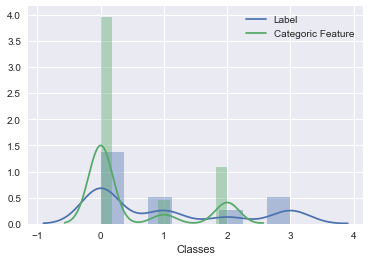

In [671]:
ax = sn.distplot(df['label'], axlabel='Classes', kde_kws={"label":'Label'} )
ax = sn.distplot(df['int.cat.feature 1'], axlabel='Classes', kde_kws={"label":'Categoric Feature'}, ax=ax )

We're going to create a frequency table for both label and categoric feature:

In [672]:
freq_table_label = pd.value_counts(df['label']).to_frame().reset_index()
freq_table_label['Labels in %']=round(freq_table_label['label']/sum(freq_table_label['label'])*100,2)

In [673]:
freq_table_label

,index,label,Labels in %
0,0.0,622,51.83
1,3.0,231,19.25
2,1.0,230,19.17
3,2.0,117,9.75


In [674]:
freq_table_feat = pd.value_counts(df['int.cat.feature 1']).to_frame().reset_index()
freq_table_feat['Feature Classes in %']=round(freq_table_feat['int.cat.feature 1']/sum(freq_table_feat['int.cat.feature 1'])*100,2)

In [675]:
freq_table_feat

,index,int.cat.feature 1,Feature Classes in %
0,0,864,72.00
1,2,235,19.58
2,1,101,8.42


The frequency table above shows surprising results for those categorical variables:

**a) Labels**
 - More than 50% of the labels on this dataset are correspondent to label 0. Also, about 20% of the data is related to labels 1 and 3 and only 10% to label 2. This clearly shows that to perform a Multi Layer Perceptron algorithm over this dataset, we will need to adopt some strategy to deal with the possible bias that would be introduced into the dataset as suggests *Philippe Thomas* on *"Perceptron Learning for Classification Problems"* (the paper is disposable [here](https://hal.archives-ouvertes.fr/hal-01232286/document));
 
**b) Categorical Variable**
- On the categorical variable, the unbalance is even higher: more than 70% of the datapoints refer to the same index (0), while only 20% refer to index 2 and 10% to index 1; However, this is not a huge problem, as this is only a feature and most of the algorithms address this properly (in case of the Percetron, the weight would be adjusted in such a way to gather the information contained inside the lower level of occurency of this event, while decision trees would use this as a threshold to determine the possible nodes of it); 

## Step 2: Pre-preparation of the dataset

### a) Dealing with the unbalance class problem

As we've seen, this dataset has unbalanced class on the labels. This can be a potential problem while performing both Multi-Layer Perceptron and Random Forests, as it could create a bias in direction of the label which is over represented, potentially creating misleading conclusions. On the first case, the weights of the perceptrons will absorb this bias generating misleading results as, on average, pointing out to some label will increase the chance of predicting it. On the second case, the decision trees that form a random forest are potentially affected as the thresholds of the nodes generated via the maximum mutual information criteria can creat a bias over each tree; notice that, on average, the random forest will also be biased toward the direction of the label with the highest frequency over the dataset. Having this in mind, this is a serious potential problem that needs to be addressed while performing an adequate formulation of the data modelling scheme.
One way to solve this problem is to define a matrix of weights related to the labels with the objective to "re-balance" them according to their  frequency. To do this, we will set following equation: firstly, define $g$ as the fraction between $s$ (the size of the sample, in this case it is $2000$) and $k$ (the number of possible classes that the label can assume, for instance, it is $4$ on this case). Also, define the vector $l_{i}$ which is a line vector with size ($f_{i},1$) with $f_{i}$ being the frequency of the label (e.g. for label $0$,  $f_{0}$ will be $622$). We want to find the vector $\bar{w_{i}}^T$ such as its product with vector $\bar{l_{i}}$ will result in $g$, for every $i=0,...,3$. Notice that each element from the vector $\bar{w_{i}}^T$ is equal to $w_{i}$, so this problem will resume to finding $w_{i}$ that satisfies this equation.

$$g= \bar{w_{i}}^T  \bar{l_{i}}$$

$$g =\frac{s}{k} $$

However, we cannot fit this weights while analysing a Multi-Layer Perceptron using MLPClassifier. 

Another way to solve this problem is to adopt a naive approach called resample. In practice, this would imply in over-sampling the classes that are under represented over the dataset until you have equally distributed data. This is a simple way to deal with unbalanced problems that could be easily implemented on our dataset. So what we're going to do is selecting randomly some observations of those classes and we will replicate them until we reach a balanced classes over the labels space. To perform this, we're going to use a package developed by imbalanced-learn called RandomOverSampler. It will perform what have been described earlier: it will over-sample the classes that are under represented with the goal to create a balanced class of labels. The documentation of this new package can be found [here](http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html). 

In [676]:
class perm:
    seed = 123456
    dataset = df.as_matrix()
    np.random.seed(seed)
    perm_dataset = np.random.permutation(dataset)
    features = perm_dataset[:,1:]
    labels = perm_dataset[:,0]

We've defined the class perm to perform a permutation over the dataset for them slice it to perform our over sampling. This has been done to create homogenous distribution of the dataset to later on while creating both training and test set finding more robust findings. 

In [677]:
from imblearn.over_sampling import RandomOverSampler

In [678]:
ros = RandomOverSampler(random_state=458689)

In [679]:
features_res, labels_res = ros.fit_sample(perm.features, perm.labels)

Checking the final result:

In [680]:
freq_table_label_res = pd.value_counts(labels_res).to_frame().reset_index()
freq_table_label_res

,index,0
0,2.0,622
1,3.0,622
2,0.0,622
3,1.0,622


In [681]:
sample = len(labels_res)
sample

2488

### b) Setting the analysis sets and pre-processment of the data

Over this section, we want to define a class that is going to perform the following objectives:
1. Dividing it into two subsets:
    - Training set: consists on the fraction over our sample that is going to be used to train the models that we're defing;
    - Validation set: is the subset of our sample that have not been presented our model before with the objective of testing its accuracy while making predictions;
2. Defining the possibility to aplly Principal Component Analysis over the data;
    
As we may want to compare different approaches to address the mentioned problems, we will define a class, as Professor Carlo Baldassi have done on the practice lesson of MLP, but with some modifications:
1. As this dataset is small (only 2488 entries after perfoming the over sampling), we've decided to divide the dataset in two sections of 70 and 30% size to represent both training and validation sets, respectively. 
2. It has been defined the possibility to apply or no Principal Component Analysis (PCA) on the data: when n_components is equal to zero, we don't perform PCA; if n_components is defined, so it will takes the n_components responsible for '100xn_components%' of the overall variance of the data. The default value of n_components has been set to be equal to 0.9 (90%);
3. We have used the same seed over our analysis to have a static analysis while trying to tune properly the hyperparameters of the model;

In [682]:
sample = len(labels_res)

In [683]:
class init_MLP:
    def __init__(self, frac_train = 0.7, n_components = 0.9, seed = 123456):
        
        np.random.seed(seed)
        do_pca = n_components is None or n_components > 0
        
        num_train=round(frac_train*sample)

        train_data = features_res[:num_train,:]
        train_target = labels_res[:num_train]
        valid_data = features_res[num_train:sample,:]
        valid_target = labels_res[num_train:sample]
        
        if do_pca:
            pca = PCA(n_components = n_components)
            pca.fit(train_data)
            train_X = pca.transform(train_data)
            valid_X = pca.transform(valid_data)
        else:
            train_X, valid_X = train_data, valid_data
        
        nc = train_X.shape[1]
        print('Number of Components = %i' % train_X.shape[1])
        
        self.train_X, self.train_y = train_X, train_target
        self.valid_X, self.valid_y = valid_X, valid_target
        self.pca = pca if do_pca else None
    
    def train(self):
        return self.train_X, self.train_y
    
    def valid(self):
        return self.valid_X, self.valid_y

## Step 2: Implementing Multi Layer Perceptron 

On this phase of our project, we're going to develop a Multi-Layer Perceptron model with the purpouse to apply over our dataset. Our goal on this section is try to explore all different settings of this algorithm (including estimation of optimal parameters and hyper-parameters over their possible space as also some suggestions over how to deal with the imbalance problem over the labels) in such a way to optimize its performance over the given dataset.

In [684]:
class init:
    def __init__(self, frac_train = 0.7, n_components = 0.9, seed = 123456):
        
        sample = len(labels_res)
        np.random.seed(seed)
        do_pca = n_components is None or n_components > 0
        
        num_train=round(frac_train*sample)

        train_data = features_res[:num_train,:]
        train_target = labels_res[:num_train]
        valid_data = features_res[num_train:sample,:]
        valid_target = labels_res[num_train:sample]
        
        if do_pca:
            pca = PCA(n_components = n_components)
            pca.fit(train_data)
            train_X = pca.transform(train_data)
            valid_X = pca.transform(valid_data)
        else:
            train_X, valid_X = train_data, valid_data
        
        nc = train_X.shape[1]
        print('Number of Components = %i' % train_X.shape[1])
        
        self.train_X, self.train_y = train_X, train_target
        self.valid_X, self.valid_y = valid_X, valid_target
        self.pca = pca if do_pca else None
    
    def train(self):
        return self.train_X, self.train_y
    
    def valid(self):
        return self.valid_X, self.valid_y

### a) Creating the raw MLP

After setting the init class, the next is step is defining the Multi-Layer Perceptron. The first thing that we do is creating an auxiliar function that will help us while analysing both training and validation sets and evaluating the results of the algorithm over them. Also, we would like to check the results after each iteration, so we can plot some findings creating the possibility to analyse some of the results graphically. This will be important while setting in an optimal way the hyperparameters of the model. This function has the following constituents:
1. We define the MLP function based on:
     1. The percentage of the total data used to perform the training;
     2. The number of components set to perform the PCA over the dataset (which can also be set as 0 i.e. not applying it over the data);
     3. A fixed seed;
     4. As the MLPClassifier has a lot of parameters, we only define the ones related to the data and we use a trick (as Professor Baldassi suggested) to fix the other parameters of it passing them as a dictionary called mlp_params; 
2. It takes the data class that have been formulated earlier as the dataset for performing the supervised learning task;
    - This class has two arguments: (i) frac_train, (ii) n_components and (iii) seed;
3. For analytical purpouse, we want to know the evolution of the MLP scores and loss function values on the test and training set after each iteration. To do this we create three empty lists that will append the results after each iteration and we use the *warm_start* option to use the result that have been found as input to the next iteration (for the documentation of MLPClassifier, click [here](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html));
4. We measure the running time in which this algorithm has taken to perform over this dataset. This is a proxy of computational efficiency for our analysis over the hyperparameter space; 

In [685]:
def MLP(frac_train =0.7, n_components = 0.9, seed = 123456,
              **mlp_params):
    
    data = init(frac_train, n_components, seed)

    max_iter = mlp_params['max_iter']
    mlperc = MLPClassifier(**mlp_params)
    
    train_scores = []
    valid_scores = []
    loss_evol = []
    start = t.time()
    for it in range(max_iter):
        mlperc.set_params(max_iter=it+1)
        mlperc.fit(*data.train())
        tscore = mlperc.score(*data.train())
        vscore = mlperc.score(*data.valid())
        loss = mlperc.loss_
        train_scores.append(tscore)
        valid_scores.append(vscore)
        loss_evol.append(loss)
        mlperc.set_params(warm_start=True)
    end = t.time()
    rt = round(end - start, 2)
    train_avg = sum(train_scores)/max_iter
    valid_avg = sum(valid_scores)/max_iter
    print(f"Average Training Score = {train_avg}; Average Validation Score = {valid_avg}; Running Time = {rt}s")
    return mlperc, data, train_scores, valid_scores, train_avg, valid_avg

### c) Fine tuning the MLP to the dataset

- Now it is time to calibrate the MLP adapting its hyperparameters with the objective to optimize its performance over our dataset. We start working over the elements of the MLPClassifier with a theoretical justification over our choices:
    1. We are going to use a Stochastic Gradient Descent algorithm proposed by Kingma, Diederik, and Jimmy Ba, i.e. the Adam solver. The reason of this choice is that it performs relatively well over large datasets (with more than a thousand entries, which is our case, resulting in a faster convergence and also an optimal running time and score over training and validation sets). Also, the learning rate chosed was constant with the objective to create a lighter algorithm starting at 1e-2;
    2. We prefer to use a regularizer term over our optimization problem i.e. setting a value over alpha;
    3. The tolerance set to this algorithm is rather small as our objective is to produce an accurate result over our dataset. This we're going to set at its default value ($1e-4$) as suggests sklearn;
    4. The batch size is related to the size of the sample that is going to be presented while performing the gradient descent algorithm (the batch algorithm) and adjusting its gradient towards the minimum;
    5. The hidden layer size is the number of hidden layers that are going to be presented over our dataset (in terms of perceptrons and in terms of width of the neural network;
    6. As we're going to use a Adam sover, we don't need to specify the following variables:
        1. momentum (for gradient descent update over each iteration);
        2. nesterovs_momentum (whether using a Nesterov's momentum or no);
- The other hyperparameters such as batch_size, hidden layer size, alpha and tolerance are going to be choosen based on tests over the dataset that are going to be plotted graphically and evaluated with its justification in terms of time and performance in terms of score. Notice that while evaluating the results over the hyperparameters space we need to choose a order to make a coeteris paribus analysis while tryng to find theis optimal values. Having this in mind, we're going to start to deal with the batch size firstly, for then  procceed the analysis over the alpha of the regularizer, and only at the end we're going to fix the size of the we've adopted this strategy as we know that as higher is the hidden layer, better would be the performance of the MLP. However, not necessarly we're chosing the other paramters in a optimal way, which would constraint our results in terms of performance over scores and efficiency;

#### (i) Chosing the optimal batch size for the dataset 

Our objective is to find a batch size that is not too costly in terms of computational efficiency and also is able to generate good results in terms of the score over both test and validation set. Having this in mind, our largest threshold for it is going to be at most 20% of the overall sample size i.e. approximately 500.

In [686]:
batch = np.linspace(50,500,10).astype(int)
batch

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [687]:
batch_tscore=[]
batch_vscore=[]
for i,v in enumerate(batch):
    print(f"Test number : {i+1}, Batch size : {v}")
    mlperc, data, train_scores, valid_scores, train_avg, valid_avg = MLP(max_iter=100, frac_train=0.7,
                                                                       hidden_layer_sizes = (100,),
                                                                       batch_size = v,
                                                                       learning_rate_init=1e-2,
                                                                       solver = 'adam',
                                                                       learning_rate = 'constant',
                                                                       momentum = 0.0,
                                                                       nesterovs_momentum = False,
                                                                       alpha = 1e-3,
                                                                       tol = 1e-3,
                                                                       seed = 123456
                                                                      )
    batch_tscore.append(train_avg)
    batch_vscore.append(valid_avg)

Test number : 1, Batch size : 50
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9626176808266357; Average Validation Score = 0.9048257372654155; Running Time = 2.36s
Test number : 2, Batch size : 100
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9697072330654422; Average Validation Score = 0.9258310991957104; Running Time = 1.42s
Test number : 3, Batch size : 150
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.966727898966705; Average Validation Score = 0.9179490616621985; Running Time = 1.31s
Test number : 4, Batch size : 200
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9624856486796787; Average Validation Score = 0.9111126005361931; Running Time = 1.29s
Test number : 5, Batch size : 250
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9569575200918479; Average Validation Score = 0.8954825737265415; Running Time = 1.17s
Test number : 6, Batch size : 300
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9538920780711824; Average Validation Score = 0.8893029490616624; Running Time = 1.42s
Test number : 7, Batch size : 350
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9494087256027552; Average Validation Score = 0.8768632707774799; Running Time = 1.4s
Test number : 8, Batch size : 400
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9447187141216985; Average Validation Score = 0.8645040214477209; Running Time = 1.09s
Test number : 9, Batch size : 450
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9411882893226169; Average Validation Score = 0.8564879356568366; Running Time = 1.1s
Test number : 10, Batch size : 500
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.93857634902411; Average Validation Score = 0.8532305630026811; Running Time = 1.09s


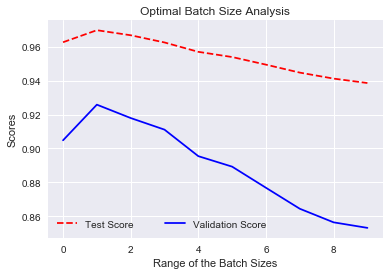

In [688]:
tes, = plt.plot(range(len(batch)), np.array(batch_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(batch)), np.array(batch_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=3)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Optimal Batch Size Analysis')
plt.ylabel('Scores')
plt.xlabel('Range of the Batch Sizes')
plt.show()

In [689]:
for i, j in enumerate(batch_vscore):
    if j == np.max(batch_vscore):
        opt_batch = batch[i]
        print(f"The optimal Batch Size is : {opt_batch}")

The optimal Batch Size is : 100


Notice that as long as the batch size increases, not necessarly the test and validation scores also increases. Clearly, there is an optimal number of batches over this dataset that maximizes both test and validation scores. This clearly happens when the batch size is set at $100$ entries.

#### (ii) Chosing the optimal penalization term - Alpha

Now we're going to set the optimal size L2 penalty of the regularization term. For this task, we're going to analyse it on basis of decimals. The analysis will be similar as the one over the batch size.

In [690]:
alpha = []
for i in range(1,11):
    size = 10**(-i)
    alpha.append(size)

In [691]:
alpha_tscore=[]
alpha_vscore=[]
for i,v in enumerate(alpha):
    print(f"Test number : {i+1}, Alpha : {v}")
    mlperc, data, train_scores, valid_scores, train_avg, valid_avg = MLP(max_iter=100, frac_train=0.7,
                                                                       hidden_layer_sizes = (100,),
                                                                       batch_size = 100,
                                                                       learning_rate_init=1e-2,
                                                                       solver = 'adam',
                                                                       learning_rate = 'constant',
                                                                       momentum = 0.0,
                                                                       nesterovs_momentum = False,
                                                                       alpha = v,
                                                                       tol = 1e-3,
                                                                       seed = 123456
                                                                      )
    alpha_tscore.append(train_avg)
    alpha_vscore.append(valid_avg)

Test number : 1, Alpha : 0.1
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9627095292766933; Average Validation Score = 0.9038873994638068; Running Time = 1.47s
Test number : 2, Alpha : 0.01
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9666360505166476; Average Validation Score = 0.9231903485254689; Running Time = 1.4s
Test number : 3, Alpha : 0.001
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9697072330654422; Average Validation Score = 0.9258310991957104; Running Time = 1.43s
Test number : 4, Alpha : 0.0001
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9695522388059701; Average Validation Score = 0.9267828418230565; Running Time = 1.49s
Test number : 5, Alpha : 1e-05
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9697990815154995; Average Validation Score = 0.9280563002680964; Running Time = 1.49s
Test number : 6, Alpha : 1e-06
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701549942594718; Average Validation Score = 0.9295844504021449; Running Time = 1.43s
Test number : 7, Alpha : 1e-07
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701492537313433; Average Validation Score = 0.9295844504021449; Running Time = 1.81s
Test number : 8, Alpha : 1e-08
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701492537313433; Average Validation Score = 0.9295844504021449; Running Time = 1.74s
Test number : 9, Alpha : 1e-09
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701492537313433; Average Validation Score = 0.9295844504021449; Running Time = 1.69s
Test number : 10, Alpha : 1e-10
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701492537313433; Average Validation Score = 0.9295844504021449; Running Time = 1.53s


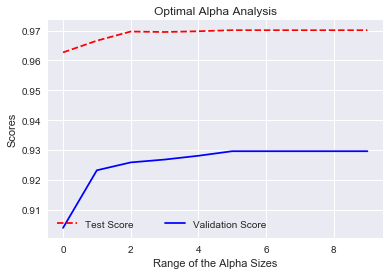

In [692]:
tes, = plt.plot(range(len(alpha)), np.array(alpha_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(alpha)), np.array(alpha_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=3)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Optimal Alpha Analysis')
plt.ylabel('Scores')
plt.xlabel('Range of the Alpha Sizes')
plt.show()

In [693]:
for i, j in enumerate(alpha_vscore):
    if j == np.max(alpha_vscore):
        opt_alpha = alpha[i]
        print(f"The optimal Alpha Size is : {opt_alpha}")

The optimal Alpha Size is : 1e-06
The optimal Alpha Size is : 1e-07
The optimal Alpha Size is : 1e-08
The optimal Alpha Size is : 1e-09
The optimal Alpha Size is : 1e-10


Notice that the learning rate have reached its maximum after the 6th iteration. After this, we can easily notice that it takes more time to run the algorithm and no improvements in terms of test and validation scores have been made (and the running time of the algorithm starts to increase, meaning costly operations). Thus, we're going to maintain the L2 size at $1e-6$.

#### (iii) Chosing the optimal level of the initialization term - learning_rate_init

We're going to procceed on the same way as we've done before with the Alpha: estimating the optimal value of the learning rate based on given values.

In [694]:
learn_rate = []
for i in range(1,11):
    size = 10**(-i)
    learn_rate.append(size)

In [695]:
learn_rate_tscore=[]
learn_rate_vscore=[]
for i,v in enumerate(learn_rate):
    print(f"Test number : {i+1}, Learning Rate : {v}")
    mlperc, data, train_scores, valid_scores, train_avg, valid_avg = MLP(max_iter=100, frac_train=0.7,
                                                                       hidden_layer_sizes = (100,),
                                                                       batch_size = 100,
                                                                       learning_rate_init=v,
                                                                       solver = 'adam',
                                                                       learning_rate = 'constant',
                                                                       momentum = 0.0,
                                                                       nesterovs_momentum = False,
                                                                       alpha = 1e-6,
                                                                       tol = 1e-3,
                                                                       seed = 123456
                                                                      )
    learn_rate_tscore.append(train_avg)
    learn_rate_vscore.append(valid_avg)

Test number : 1, Learning Rate : 0.1
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.8700287026406431; Average Validation Score = 0.7176943699731905; Running Time = 1.4s
Test number : 2, Learning Rate : 0.01
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701549942594718; Average Validation Score = 0.9295844504021449; Running Time = 2.0s
Test number : 3, Learning Rate : 0.001
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.8681400688863375; Average Validation Score = 0.6845978552278822; Running Time = 2.94s
Test number : 4, Learning Rate : 0.0001
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.6230482204362802; Average Validation Score = 0.3016621983914209; Running Time = 2.09s
Test number : 5, Learning Rate : 1e-05
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.26202066590126283; Average Validation Score = 0.16056300268096504; Running Time = 1.82s
Test number : 6, Learning Rate : 1e-06
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.20888633754305386; Average Validation Score = 0.1762466487935656; Running Time = 2.07s
Test number : 7, Learning Rate : 1e-07
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.2073191733639494; Average Validation Score = 0.1796246648793568; Running Time = 1.85s
Test number : 8, Learning Rate : 1e-08
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.2064695752009189; Average Validation Score = 0.1796246648793568; Running Time = 1.64s
Test number : 9, Learning Rate : 1e-09
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.20608495981630298; Average Validation Score = 0.1796246648793568; Running Time = 1.58s
Test number : 10, Learning Rate : 1e-10
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.20608495981630298; Average Validation Score = 0.1796246648793568; Running Time = 1.94s


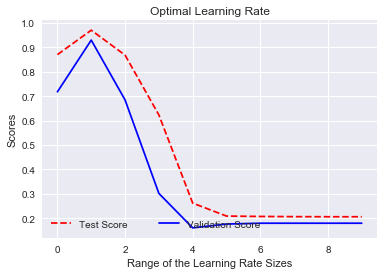

In [696]:
tes, = plt.plot(range(len(learn_rate)), np.array(learn_rate_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(learn_rate)), np.array(learn_rate_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=3)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Optimal Learning Rate')
plt.ylabel('Scores')
plt.xlabel('Range of the Learning Rate Sizes')
plt.show()

In [697]:
for i, j in enumerate(learn_rate_vscore):
    if j == np.max(learn_rate_vscore):
        opt_lear = learn_rate[i]
        print(f"The optimal Learning Rate is : {opt_lear}")

The optimal Learning Rate is : 0.01


We can clearly notice that the scores over both training and validation sets decreases after the $1e-2$ value of the learning rate. With this, we're going to set this value over the learning rate from now on. 

#### (iv) Hidden Layers Size

At this time, our main objective is to find an optimal number of perceptrons over the hidden layer for this dataset. Our first consideration is that we're going to define only one hidden layer for this MLP. This is due to the fact that we can obtain a pretty good result with a sufficiently high number of perceptrons over the first hidden layer on our dataset ([Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem])). We're going to fix the maximum number of perceptrons over the hidden layer to be below 500 as threshold (we've defined this celling with the objective to make the computational cost light to have a good running time of this algorithm) placing an increment of 25 over 25 new perceptrons.

In [698]:
percep_num = np.linspace(25,500,20).astype(int)
percep_num

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500])

In [699]:
percep_num_tscore=[]
percep_num_vscore=[]
for i,v in enumerate(percep_num):
    print(f"Test number : {i+1}, Tol : {v}")
    mlperc, data, train_scores, valid_scores, train_avg, valid_avg = MLP(max_iter=100, frac_train=0.7,
                                                                       hidden_layer_sizes = (v,),
                                                                       batch_size = 100,
                                                                       learning_rate_init=1e-2,
                                                                       solver = 'adam',
                                                                       learning_rate = 'constant',
                                                                       momentum = 0.0,
                                                                       nesterovs_momentum = False,
                                                                       alpha = 1e-6,
                                                                       tol = 1e-4,
                                                                       seed = 123456
                                                                      )
    percep_num_tscore.append(train_avg)
    percep_num_vscore.append(valid_avg)

Test number : 1, Tol : 25
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.8883696900114814; Average Validation Score = 0.7007640750670245; Running Time = 1.13s
Test number : 2, Tol : 50
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9432261768082665; Average Validation Score = 0.8524664879356565; Running Time = 1.43s
Test number : 3, Tol : 75
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9610218140068888; Average Validation Score = 0.8977613941018764; Running Time = 1.4s
Test number : 4, Tol : 100
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701549942594718; Average Validation Score = 0.9295844504021449; Running Time = 2.02s
Test number : 5, Tol : 125
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9682146957520092; Average Validation Score = 0.9274128686327078; Running Time = 2.23s
Test number : 6, Tol : 150
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9731859931113662; Average Validation Score = 0.9319302949061661; Running Time = 2.1s
Test number : 7, Tol : 175
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.969500574052813; Average Validation Score = 0.9242225201072387; Running Time = 2.14s
Test number : 8, Tol : 200
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.97105625717566; Average Validation Score = 0.9260589812332439; Running Time = 2.37s
Test number : 9, Tol : 225
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9752009184845006; Average Validation Score = 0.9407908847184987; Running Time = 2.64s
Test number : 10, Tol : 250
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9735189437428243; Average Validation Score = 0.9330697050938338; Running Time = 2.62s
Test number : 11, Tol : 275
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9713605051664754; Average Validation Score = 0.9323994638069705; Running Time = 2.89s
Test number : 12, Tol : 300
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9747014925373133; Average Validation Score = 0.9450134048257371; Running Time = 3.33s
Test number : 13, Tol : 325
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9753157290470724; Average Validation Score = 0.940965147453083; Running Time = 4.92s
Test number : 14, Tol : 350
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.972313432835821; Average Validation Score = 0.9343699731903485; Running Time = 4.07s
Test number : 15, Tol : 375
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9735935706084959; Average Validation Score = 0.943029490616622; Running Time = 5.28s
Test number : 16, Tol : 400
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9755625717566017; Average Validation Score = 0.9408847184986595; Running Time = 4.25s
Test number : 17, Tol : 425
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9747818599311137; Average Validation Score = 0.9339678284182307; Running Time = 4.54s
Test number : 18, Tol : 450
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9709127439724454; Average Validation Score = 0.9372922252010725; Running Time = 4.88s
Test number : 19, Tol : 475
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9721699196326062; Average Validation Score = 0.935201072386059; Running Time = 5.76s
Test number : 20, Tol : 500
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9726176808266362; Average Validation Score = 0.9334852546916889; Running Time = 5.53s


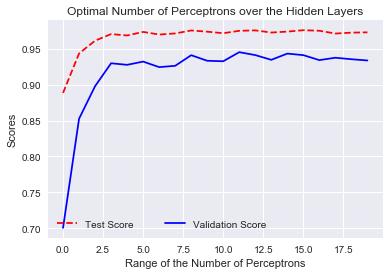

In [700]:
tes, = plt.plot(range(len(percep_num)), np.array(percep_num_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(percep_num)), np.array(percep_num_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=3)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Optimal Number of Perceptrons over the Hidden Layers')
plt.ylabel('Scores')
plt.xlabel('Range of the Number of Perceptrons')
plt.show()

In [701]:
for i, j in enumerate(percep_num_vscore):
    if j == np.max(percep_num_vscore):
        opt_percep = percep_num[i]
        print(f"The optimal number of Perceptrons over the Hidden Layers is : {opt_percep}")

The optimal number of Perceptrons over the Hidden Layers is : 300


#### (v) Choosing the optimal number of iterations until convergence - max_iter 

Now that we've already addressed the main hyperparameters of the MLP model, our objective now is to find an optimal number of iterations to make the algorithm converge in the quickest way as possible.

In [702]:
percep_it = np.linspace(20,400,20).astype(int)
percep_it

array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300, 320, 340, 360, 380, 400])

In [703]:
percep_it_tscore=[]
percep_it_vscore=[]
for i,v in enumerate(percep_it):
    print(f"Test number : {i+1}, Number of iterations : {v}")
    mlperc, data, train_scores, valid_scores, train_avg, valid_avg = MLP(max_iter = v, frac_train=0.7,
                                                                       hidden_layer_sizes = (v,),
                                                                       batch_size = 100,
                                                                       learning_rate_init=1e-2,
                                                                       solver = 'adam',
                                                                       learning_rate = 'constant',
                                                                       momentum = 0.0,
                                                                       nesterovs_momentum = False,
                                                                       alpha = 1e-6,
                                                                       tol = 1e-4,
                                                                       seed = 123456
                                                                      )
    percep_it_tscore.append(train_avg)
    percep_it_vscore.append(valid_avg)

Test number : 1, Number of iterations : 20
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.7649540757749712; Average Validation Score = 0.5224530831099196; Running Time = 0.37s
Test number : 2, Number of iterations : 40
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.8838260619977035; Average Validation Score = 0.6973190348525471; Running Time = 0.6s
Test number : 3, Number of iterations : 60
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9265308075009567; Average Validation Score = 0.8049597855227879; Running Time = 0.93s
Test number : 4, Number of iterations : 80
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9511265786452352; Average Validation Score = 0.884936327077748; Running Time = 1.33s
Test number : 5, Number of iterations : 100
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9701549942594718; Average Validation Score = 0.9295844504021449; Running Time = 1.74s
Test number : 6, Number of iterations : 120
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9745838117106772; Average Validation Score = 0.9341152815013404; Running Time = 2.53s
Test number : 7, Number of iterations : 140
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9799983598491063; Average Validation Score = 0.952029873611643; Running Time = 2.84s
Test number : 8, Number of iterations : 160
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9839444603903559; Average Validation Score = 0.9586377345844503; Running Time = 3.6s
Test number : 9, Number of iterations : 180
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9860441382829441; Average Validation Score = 0.9636356866249628; Running Time = 4.33s
Test number : 10, Number of iterations : 200
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.98552812858783; Average Validation Score = 0.9630294906166219; Running Time = 5.62s
Test number : 11, Number of iterations : 220
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9885032877570191; Average Validation Score = 0.9742200828661954; Running Time = 6.45s
Test number : 12, Number of iterations : 240
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9891934557979334; Average Validation Score = 0.9718833780160858; Running Time = 7.43s
Test number : 13, Number of iterations : 260
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9896935441137509; Average Validation Score = 0.977036502371623; Running Time = 8.7s
Test number : 14, Number of iterations : 280
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9910242742332295; Average Validation Score = 0.9779634239754882; Running Time = 9.8s
Test number : 15, Number of iterations : 300
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9915671641791044; Average Validation Score = 0.9816711349419124; Running Time = 10.35s
Test number : 16, Number of iterations : 320
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9906913748564868; Average Validation Score = 0.9793523793565683; Running Time = 12.21s
Test number : 17, Number of iterations : 340
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9927517390423448; Average Validation Score = 0.9834884087683331; Running Time = 13.15s
Test number : 18, Number of iterations : 360
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9935514734022196; Average Validation Score = 0.9844652963955913; Running Time = 14.02s
Test number : 19, Number of iterations : 380
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9938923802042421; Average Validation Score = 0.9849089882884153; Running Time = 14.62s
Test number : 20, Number of iterations : 400
Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9938906429391504; Average Validation Score = 0.9852211796246649; Running Time = 18.62s


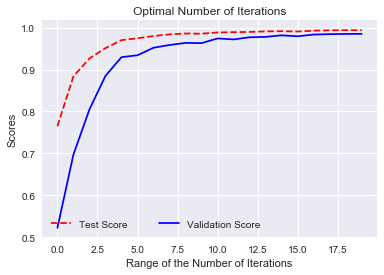

In [704]:
tes, = plt.plot(range(len(percep_it)), np.array(percep_it_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(percep_it)), np.array(percep_it_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=3)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Optimal Number of Iterations')
plt.ylabel('Scores')
plt.xlabel('Range of the Number of Iterations')
plt.show()

In [705]:
for i, j in enumerate(percep_it_vscore):
    if j == np.max(percep_it_vscore):
        opt_perc_it = percep_it[i]
        print(f"The optimal number of Iterations is : {opt_perc_it}")

The optimal number of Iterations is : 400


Clearly, as higher is the number of iterations, higher will be the performance of our algorithm. However, this comes at a price of a higher computational cost and time. As our sample is relatively small, we're going to choose the highest number of iterations with the objective to demonstrate the power of our algorithm. In practice, this is not the best approach, as we could have a larger dataset and this procedure is impractible.

### d) Final Results of a MLP

Setting two options of maximum number of iterations: a max_iter size that equals the running time of the Random Forest algorithm and one which would result on a better result but with a higher running time.

In [706]:
# Setting the max_iter to its highest value with the objective to generate a good convergence of the algorithm
mlperc, data, train_scores, valid_scores, train_avg, valid_avg = MLP(max_iter=400, frac_train=0.7,
                                                                   hidden_layer_sizes = (300,),
                                                                   batch_size = 100,
                                                                   learning_rate_init=1e-2,
                                                                   solver = 'adam',
                                                                   learning_rate = 'constant',
                                                                   momentum = 0.0,
                                                                   nesterovs_momentum = False,
                                                                   alpha = 1e-6,
                                                                   tol = 1e-4,
                                                                   seed = 123456
                                                                      )

Number of Components = 12


C:\Users\lelec\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average Training Score = 0.9936753731343283; Average Validation Score = 0.9862533512064343; Running Time = 14.17s


Aggregating all results that we've been developing over the last section, the MLP could have provided an Average Validation Score of 98.6% which is rather feasible and reasonable after all fine tuning made. 

## Step 4: Implementing a Random Forest

The third step over our individual project consists in applying a Random Forest model over our dataset. Our main objective here is to explore the best seeting of this algorithm without over-fitting it. Also, we're going to apply it over our already re-sampled dataset (that we've turned into a balanced using a random sampling technique over the step 2 section) as the results of a random forest is also affected by the unbalanced labels problem.

### a) Creating the raw Random Forest 

Most of what we've done over the MLP syntax can easily be applied over our Random Forest model. Regarding this, the first thing that we need to develop is the basis of what is going to be our Random Forest - this is the case for the init class that we've created. This class as we've suggested earlier, is important to pre-prepare the data initially shuffling it for then dividing into training and validation sets and also setting the possibility of applying PCA over the dataset. After we've been set the init class, we need to define the basis of the Random Forests model. We start doing this creating an auxiliar function that will set the basis of the algorithm without passing over it all parameters that we want to choose later on via validation. Going part by part, the random forest function has the following elements:
1. We define the rand_trees based on:
     1. The fraciton of the overall sample used for training purpouses;
     2. The number of components set to perform the PCA over the dataset (which can also be set as 0 i.e. not performing PCA);
     3. A fixed seed to fix the results;
     4. Just as we have done with the MLP function, as the random tree demands a lot of parameters, we're going to fix them later on and so we're going to pass them as a dictionary; 
2. It takes the data class that have been formulated earlier as the dataset for performing the supervised learning task;
    - This class has two arguments: (i) frac_train, (ii) n_components and (iii) seed;

In [707]:
def rand_trees(frac_train = 0.7, seed = 123457, n_components = 0.9,
                 **xtrees_params):
    
    data = init(frac_train, n_components, seed)
    
    xtrees = ExtraTreesClassifier(**xtrees_params)
    start = t.time()
    xtrees.fit(*data.train())
    train_score = xtrees.score(*data.train())
    valid_score = xtrees.score(*data.valid())
    end = t.time()
    rt = round(end - start, 2)
    print(f"Average Training Score = {train_score}; Average Validation Score = {valid_score}; Running Time = {rt}s")
    return xtrees, data, train_score, valid_score, rt

### b)  Fine tuning the Random Forests to our dataset

The next step of our analysis consists in an optimization of the hyperparameters based on the values that they can assume over the hyperparameters' space. An important practical consideration over the Random Forests model is that its constituents i.e. the decision trees are very prone to overfitting if we consider a rather complex and deep tree. Having this in mind, is very important to create thresholds with the objective of bounding the possible outcomes in such a way that it would be able to generate a rich analysis but strict only to feasible results. In practical terms, we want to create some restrictions 
We start to explore the hyperparameter space over the theoretical decisions over the hyperparameters of the model for then procceed a exploration over the hyperparameters.
1. Theoretical decision:
    1. The criterium choosen to define the random forest is based on the entropy concept i.e. minimizing the entropy or maximizing the mutual information of the dataset. The main reason behind this criterium is that it is able to create simple trees that can be much more easily interpretable; 
    2. We have choosen the minimum needed number of entries to the tree made a split to be 2. This is very important to create a constraint over the complexity of the trees that constitute the random forest, not allowing them to specialize too much over this particular dataset. However, as we've not much observations, we assume that the random forest is able to deal with the overfitting in relation to the extension of the tree.
    3. The minimum sample leaf will be set in such a way to avoid the specialization of the model even through noise;
    4. The number of features that is going to be analysed has been set to 'auto' - this option takes the square root of the number of features;
    5. The depth of the trees is also going to be set in such a way to avoid overfitting over a validation trial;
    6. Both boostrap and also the out-of-bag samples to estimate the generalization accuracy (oob_score) are going to be tested at the final with the objective to check the robustness of the results;

#### (i) Setting the minimum number of leafs

The first part of our practical analysis against overfitting will be through the setting of the number of elements over the final leafs of the tree. This is a way to not allow the singular decision trees to gather noise of the data instead of true signals.

In [708]:
min_leaf = np.linspace(1,25,25).astype(int)
min_leaf

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [709]:
min_leaf_tscore=[]
min_leaf_vscore=[]
for i,v in enumerate(min_leaf):
    print(f"Test number : {i+1}, Number of elements on each leaf : {v}")
    xtrees, data, train_score, valid_score, rt = rand_trees(
                                                frac_train = 0.7, n_components = 0.9,
                                                n_estimators = 50,
                                                max_features = 'auto',
                                                criterion = "entropy",
                                                max_depth = None,
                                                min_samples_split = 2,
                                                min_samples_leaf=v,
                                                seed = 123457,
                                                bootstrap = None,
                                                oob_score = None,
                                                n_jobs = 4
                                                )
    min_leaf_tscore.append(train_score)
    min_leaf_vscore.append(valid_score)

Test number : 1, Number of elements on each leaf : 1
Number of Components = 12
Average Training Score = 1.0; Average Validation Score = 1.0; Running Time = 0.4s
Test number : 2, Number of elements on each leaf : 2
Number of Components = 12
Average Training Score = 1.0; Average Validation Score = 1.0; Running Time = 0.36s
Test number : 3, Number of elements on each leaf : 3
Number of Components = 12
Average Training Score = 0.9781859931113662; Average Validation Score = 0.806970509383378; Running Time = 0.36s
Test number : 4, Number of elements on each leaf : 4
Number of Components = 12
Average Training Score = 0.960390355912744; Average Validation Score = 0.6434316353887399; Running Time = 0.39s
Test number : 5, Number of elements on each leaf : 5
Number of Components = 12
Average Training Score = 0.9230769230769231; Average Validation Score = 0.4128686327077748; Running Time = 0.38s
Test number : 6, Number of elements on each leaf : 6
Number of Components = 12
Average Training Score =

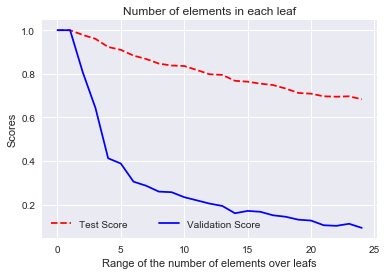

In [710]:
tes, = plt.plot(range(len(min_leaf)), np.array(min_leaf_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(min_leaf)), np.array(min_leaf_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=3)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Number of elements in each leaf')
plt.ylabel('Scores')
plt.xlabel('Range of the number of elements over leafs')
plt.show()

From this analysis, it is clear that this algorithm is fitting a lot of noise over it. As a result, it seems to be prudent take at least 3 elements in each leaf as the lowest number of elements after the algorithm reveals to be overfitting noise on it. We want to make it clear that this boundary have been picked with the main objective to control the robustness of the model over unseen data. We could have choosen only one entrie over each leaf. However, this would result in model specified to this dataset while absorbing all noise over the data as signals (which is wrong).

#### (ii) Setting the number of trees over the Random Forest

The second part of our analysis consists in setting an optimal size in terms of trees on the Random Forests model. Our objective is to find a certain size that would generate a good level of randomization in each tree leaving resulting in a good estimation over the true test and validation scores. Also, this is important to balance potential fitting problems within trees, generating unbiased estimations.

In [711]:
num_trees = np.linspace(25,500,20).astype(int)
num_trees

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500])

In [712]:
num_trees_tscore=[]
num_trees_vscore=[]
for i,v in enumerate(num_trees):
    print(f"Test number : {i+1}, Number of trees : {v}")
    xtrees, data, train_score, valid_score, rt = rand_trees(
                                                frac_train = 0.7, n_components = 0.9,
                                                n_estimators = v,
                                                max_features = 'auto',
                                                criterion = "entropy",
                                                max_depth = None,
                                                min_samples_split = 2,
                                                min_samples_leaf=3,
                                                seed = 123457,
                                                bootstrap = None,
                                                oob_score = None,
                                                n_jobs = 4
                                                )
    num_trees_tscore.append(train_score)
    num_trees_vscore.append(valid_score)

Test number : 1, Number of trees : 25
Number of Components = 12
Average Training Score = 0.9781859931113662; Average Validation Score = 0.8190348525469169; Running Time = 0.35s
Test number : 2, Number of trees : 50
Number of Components = 12
Average Training Score = 0.9781859931113662; Average Validation Score = 0.806970509383378; Running Time = 0.38s
Test number : 3, Number of trees : 75
Number of Components = 12
Average Training Score = 0.9799081515499426; Average Validation Score = 0.8203753351206434; Running Time = 0.4s
Test number : 4, Number of trees : 100
Number of Components = 12
Average Training Score = 0.9804822043628014; Average Validation Score = 0.8324396782841823; Running Time = 0.58s
Test number : 5, Number of trees : 125
Number of Components = 12
Average Training Score = 0.981630309988519; Average Validation Score = 0.8297587131367292; Running Time = 0.57s
Test number : 6, Number of trees : 150
Number of Components = 12
Average Training Score = 0.9827784156142365; Averag

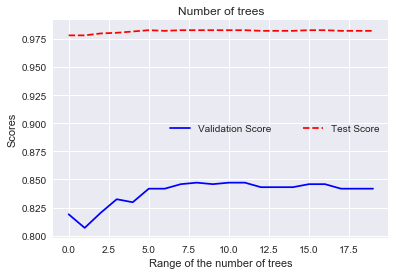

In [713]:
tes, = plt.plot(range(len(num_trees)), np.array(num_trees_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(num_trees)), np.array(num_trees_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=5)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=10)
plt.title('Number of trees')
plt.ylabel('Scores')
plt.xlabel('Range of the number of trees')
plt.show()

In [714]:
for i, j in enumerate(num_trees_vscore):
    if j == np.max(num_trees_vscore):
        opt_num_trees = num_trees[i]
        print(f"The optimal number of Trees is : {opt_num_trees}")

The optimal number of Trees is : 225
The optimal number of Trees is : 275
The optimal number of Trees is : 300


As we've seen, the optimal number of trees over this dataset is both 225, 275 and 300. As a result, we're going to choose the smaller one as it is more efficient in terms of computational cost (it takes only 0.58s to run). Notice that this is a naive approach as our objective is to find the highest non-biased scores on both test and validation set as also maximizing the computational efficiency of the models. However, there are a bunch of other factors that affect this 'optimal' decision, which in turns would generate different results. 

#### (iii) Setting the depth of the tree

This is one of the most complicated parts over decision trees algorithms. A rather long decisiont tree is very prone to overfitting while a shallow tree is much easier to interpret and also provides more robust results. Thus, our objective is to find a depth over the tree that would result in an optimal seeting for this algorithm.

In [715]:
dep = np.linspace(1,50,11).astype(int)
dep

array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [716]:
dep_tscore=[]
dep_vscore=[]
for i,v in enumerate(dep):
    print(f"Test number : {i+1}, Depth : {v}")
    xtrees, data, train_score, valid_score, rt = rand_trees(
                                                frac_train = 0.7, n_components = 0.9,
                                                n_estimators = 225,
                                                max_features = 'auto',
                                                criterion = "entropy",
                                                max_depth = v,
                                                min_samples_split = 2,
                                                min_samples_leaf=3,
                                                seed = 123457,
                                                bootstrap = None,
                                                oob_score = None,
                                                n_jobs = 4
                                                )
    dep_tscore.append(train_score)
    dep_vscore.append(valid_score)

Test number : 1, Depth : 1
Number of Components = 12
Average Training Score = 0.5166475315729047; Average Validation Score = 0.0; Running Time = 0.95s
Test number : 2, Depth : 5
Number of Components = 12
Average Training Score = 0.6819747416762342; Average Validation Score = 0.11662198391420911; Running Time = 0.64s
Test number : 3, Depth : 10
Number of Components = 12
Average Training Score = 0.9098737083811711; Average Validation Score = 0.4973190348525469; Running Time = 0.61s
Test number : 4, Depth : 15
Number of Components = 12
Average Training Score = 0.9730195177956372; Average Validation Score = 0.7882037533512064; Running Time = 0.83s
Test number : 5, Depth : 20
Number of Components = 12
Average Training Score = 0.9822043628013777; Average Validation Score = 0.8458445040214477; Running Time = 0.94s
Test number : 6, Depth : 25
Number of Components = 12
Average Training Score = 0.9827784156142365; Average Validation Score = 0.8471849865951743; Running Time = 0.95s
Test number : 

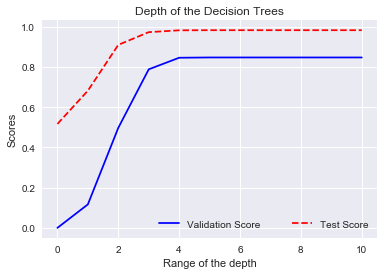

In [717]:
tes, = plt.plot(range(len(dep)), np.array(dep_tscore), color='red', label='Test Score', linestyle='--')
val, = plt.plot(range(len(dep)), np.array(dep_vscore), color='blue', label='Validation Score')
tes_leg = plt.legend(handles=[tes], loc=4)
ax = plt.gca().add_artist(tes_leg)
plt.legend(handles=[val], loc=8)
plt.title('Depth of the Decision Trees')
plt.ylabel('Scores')
plt.xlabel('Range of the depth')
plt.show()

In [718]:
for i, j in enumerate(dep_vscore):
    if j == np.max(dep_vscore):
        opt_dep = dep[i]
        print(f"The optimal depth of the trees is : {opt_dep}")

The optimal depth of the trees is : 25
The optimal depth of the trees is : 30
The optimal depth of the trees is : 35
The optimal depth of the trees is : 40
The optimal depth of the trees is : 45
The optimal depth of the trees is : 50


Those results suggests that after the 25 level of deepth all the trees will generate the same scores as they've stabilizes at a constant level. As a result, we prefer to choose the smallest level that generate the best results as it will be less prone to be affected by misleading signals of the dataset.

### c) Final results of the Random Forests 

In [719]:
xtrees, data, train_score, valid_score, rt = rand_trees(
                                        frac_train = 0.7, n_components = 0.9,
                                        n_estimators = 225,
                                        max_features = 'auto',
                                        criterion = "entropy",
                                        max_depth = 25,
                                        min_samples_split = 2,
                                        min_samples_leaf = 3,
                                        seed = 123457,
                                        bootstrap = None,
                                        oob_score = None,
                                        n_jobs = 4
                                        )

Number of Components = 12
Average Training Score = 0.9827784156142365; Average Validation Score = 0.8471849865951743; Running Time = 0.99s


As we've finished our calibration, the next step will be based on applying bootstrapping method over our sample for the checking its out-of-box score. This have been made with the purpouse to create a robustness test over the model that we suggest.

In [720]:
xtrees, data, train_score, valid_score, rt = rand_trees(
                                        frac_train = 0.7, n_components = 0.9,
                                        n_estimators = 225,
                                        max_features = 'auto',
                                        criterion = "entropy",
                                        max_depth = 25,
                                        min_samples_split = 2,
                                        min_samples_leaf = 3,
                                        seed = 123457,
                                        bootstrap = True,
                                        oob_score = True,
                                        n_jobs = 4
                                        )

Number of Components = 12
Average Training Score = 0.9529276693455798; Average Validation Score = 0.5804289544235925; Running Time = 0.82s


The final results over the Random Forests model provided an average validation score of 84.7% without bootstrapping and 58.0% applying this method. 

## Step 5: Conclusions

After doing all estimations and applying both algorithms over our dataset, we've been able to find the following results:
- **Multi-Layer Perceptron:**
    1. Optimal MLP settings:
        - Average Training Score = 0.9936753731343283; Average Validation Score = 0.9862533512064343; 
    2. Comparable MLP settings:
        - Average Training Score = 0.9265308075009567; Average Validation Score = 0.8049597855227879; 
- **Random Forests:**
    1. Without bootstrapping:
        - Average Training Score = 0.9827784156142365; Average Validation Score = 0.8471849865951743; 
    2. With boostrapping:
        - Average Training Score = 0.9529276693455798; Average Validation Score = 0.5804289544235925; 
        
The first thing that it is important to point out it that all our premises over the distribution of the data points over our dataset, re-sampling methods and also calibration of the models via fine tuning over the hyperparameters, turn what we've done specified to this dataset, subjected to the validity of all hypothesis and theoretical implications that have been pointed out throughout this notebook. This clearly shows that different premises would result in better results over one or other model.
We now start to compare both results that we've finded. It is clear that our main objective was finding a model that is the best non-biased estimator/ predictor over the data that have been provided. We've started our analysis proposing a solution to the unbalance problem over the class of labels that could potentially bias our result towards the more frequent class. We have suggested to use a weight setting to solve this problem; however the sklearn limitations over the MLP package doesn't have this option (notice that the Linear model perceptron has the _class_weight_ parameter, which is what we would like to set). With this, using a randomized re-sampler even being a naive approach was the solution that we've adopted as it provide good results without demanding a lot of pre-preparation of the data.
Over the models that we've estimated, the focus was mainly on creating a good cost-benefit estimation in terms of score and computational efficiency. Over this, it is clear that the Random Forest model is by far much quicker than the MLP, while it have performed our final results in about 5~6% of the total time that the MLP have taken (this over my CPU, it varies depending on the hardware of your computer). Over large datasets this is very important as the computational cost of a MLP could be too high to compensate its estimation. However, as we've pointed, the Random Forest algorithm is very prone to overfitting of noise instead of true signal data over it - when we leave all the parameters on automoatic and we don't set a minimum leaf size it reaches a score of 1 on both training and validationset, which is clearly not true as this decreases significantly changing marginally some parameters, revealing that those estimations are not robust. This point is clear when we analyse the minimum leaf size - setting this parameter to 5 entries decreases significantly the performance of the algorithm. Setting a very small threshold of only 3 entries (about 0.1% over all dataset) was enough to undermine the scores of this model. Over the Multi-Layer Perceptron, one could say that fixing the maximum number of iterations to 400 takes a long time to perform analysis over this dataset, which is true. Having this in mind, we've choosen a more comparable option which takes more or less the same time to run as a random forest and we've find out that the scores are similar. In terms of interpretability of results, it seems that the potential advantages of the Random Forest doesn't apply here, as the the trees are very depth and the size of forest is particularly high, which makes both MLP and Random Forest algorithms on the same side.
Thus, we conclude that for this dataset, the Multi-Layer Perceptron is better. Despite its computational cost (in terms of running time) its robustness seems to hold better, providing results that are not affected by little changes over the parameters and also pointing out to a good score over test and validation set. 